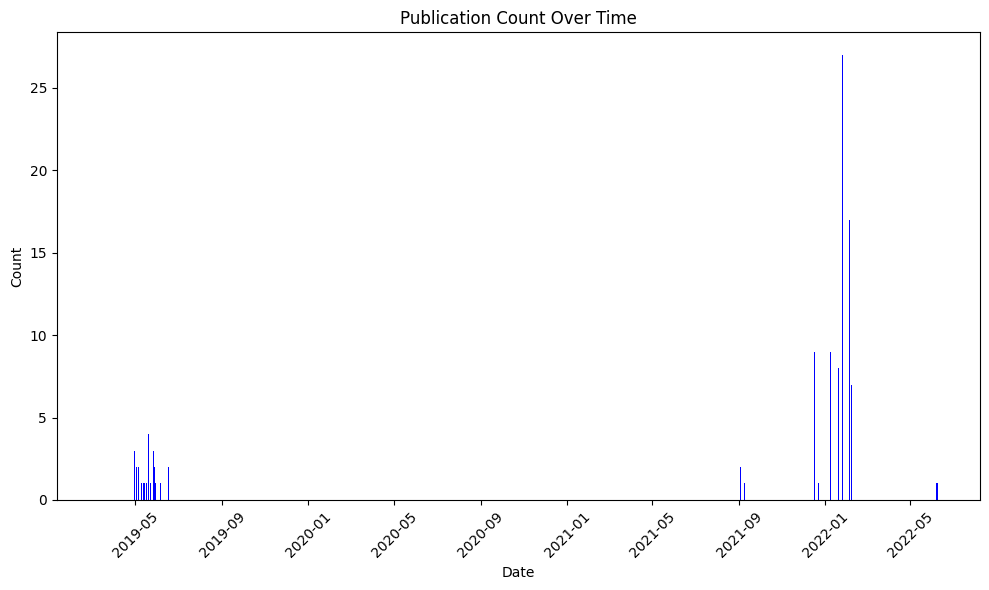

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Function to parse TEI files and extract publication dates
def parse_tei_files(folder_path):
    # Initialize a dictionary to store the data
    publication_dates = {}

    # Namespace dictionary
    ns = {'tei': 'http://www.tei-c.org/ns/1.0'}

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.xml'):
            file_path = os.path.join(folder_path, filename)
            tree = ET.parse(file_path)
            root = tree.getroot()

            # Extract publication date
            date_elem = root.find('.//tei:publicationStmt/tei:date[@when]', namespaces=ns)
            if date_elem is not None:
                publication_date = date_elem.get('when')
                if publication_date in publication_dates:
                    publication_dates[publication_date] += 1
                else:
                    publication_dates[publication_date] = 1

    return publication_dates

# Main function
def main(input_folder, output_folder):
    # Parse TEI files and extract publication dates
    publication_dates = parse_tei_files(input_folder)

    # Convert dictionary to pandas DataFrame
    df = pd.DataFrame(publication_dates.items(), columns=['Date', 'Count'])
    df['Date'] = pd.to_datetime(df['Date'])

    # Sort DataFrame by Date
    df = df.sort_values(by='Date')

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.bar(df['Date'], df['Count'], color='blue')
    plt.title('Publication Count Over Time')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save plot as image
    plt.savefig(os.path.join(output_folder, 'publication_count.png'))

    # Display plot
    plt.show()

    # Save DataFrame to CSV
    csv_path = os.path.join(output_folder, 'publication_count.csv')
    df.to_csv(csv_path, index=False)

# Specify input and output folders
input_folder = '../results'  # Adjust the path as needed
output_folder = 'output'

# Call main function
main(input_folder, output_folder)
